In [7]:
import numpy as np
import glob
import matplotlib.pyplot as plt

[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


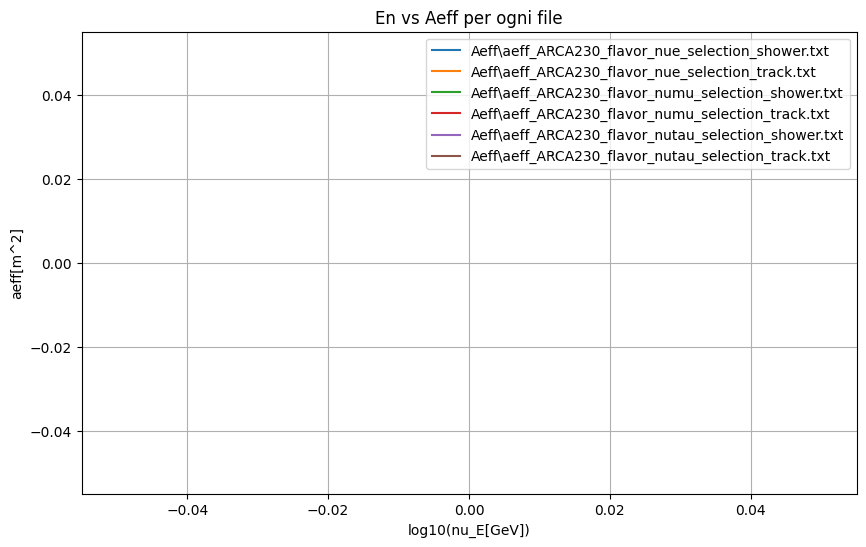

In [10]:
Aeff_list = glob.glob('Aeff/aeff_ARCA230_flavor_*.txt')

plt.figure(figsize=(10, 6))


for aef in Aeff_list:
    # Usa np.genfromtxt per saltare la prima riga (header)
    data = np.genfromtxt(aef, delimiter=',', skip_header=1)
    
    # Escludi la prima colonna
    En = data[0, 1:]
    Aeff = data[1, 1:]

  # Plotta En vs Aeff
    plt.plot(En, Aeff, label=aef)
    print(En)
# Aggiungi etichette e titolo
plt.xlabel('log10(nu_E[GeV])')
plt.ylabel('aeff[m^2]')
plt.title('En vs Aeff per ogni file')
plt.legend()
plt.grid(True)

# Mostra il plot
plt.show()


Files found: ['Aeff\\aeff_ARCA230_flavor_nue_selection_shower.txt', 'Aeff\\aeff_ARCA230_flavor_nue_selection_track.txt', 'Aeff\\aeff_ARCA230_flavor_numu_selection_shower.txt', 'Aeff\\aeff_ARCA230_flavor_numu_selection_track.txt', 'Aeff\\aeff_ARCA230_flavor_nutau_selection_shower.txt', 'Aeff\\aeff_ARCA230_flavor_nutau_selection_track.txt']
Reading file: Aeff\aeff_ARCA230_flavor_nue_selection_shower.txt
Data shape: (140, 2)
En: [1.075 1.125 1.175 1.225 1.275 1.325 1.375 1.425 1.475 1.525 1.575 1.625
 1.675 1.725 1.775 1.825 1.875 1.925 1.975 2.025 2.075 2.125 2.175 2.225
 2.275 2.325 2.375 2.425 2.475 2.525 2.575 2.625 2.675 2.725 2.775 2.825
 2.875 2.925 2.975 3.025 3.075 3.125 3.175 3.225 3.275 3.325 3.375 3.425
 3.475 3.525 3.575 3.625 3.675 3.725 3.775 3.825 3.875 3.925 3.975 4.025
 4.075 4.125 4.175 4.225 4.275 4.325 4.375 4.425 4.475 4.525 4.575 4.625
 4.675 4.725 4.775 4.825 4.875 4.925 4.975 5.025 5.075 5.125 5.175 5.225
 5.275 5.325 5.375 5.425 5.475 5.525 5.575 5.625 5.675 5.72

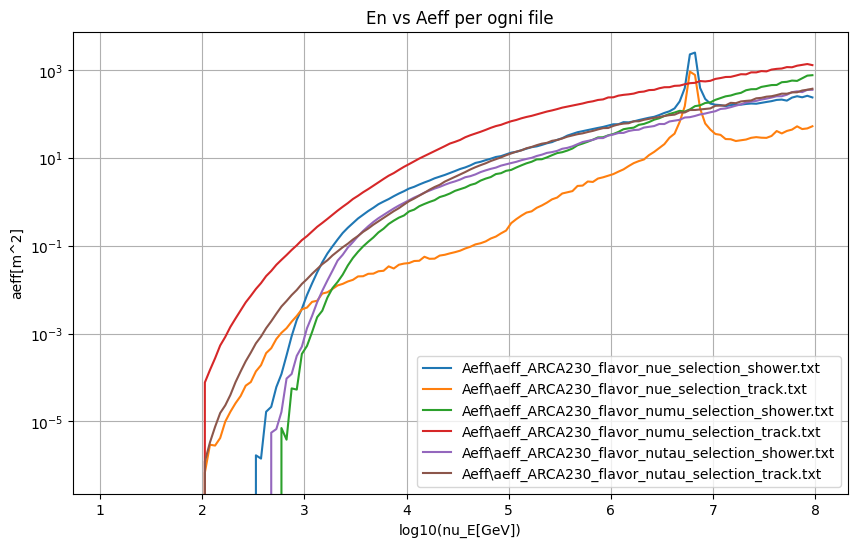

In [17]:
import numpy as np
import glob
import matplotlib.pyplot as plt

# Trova tutti i file che corrispondono al pattern
Aeff_list = glob.glob('Aeff/aeff_ARCA230_flavor_*.txt')

# Verifica che i file siano trovati correttamente
print("Files found:", Aeff_list)

# Inizializza il plot
plt.figure(figsize=(10, 6))

# Itera attraverso ogni file e plottane i dati
for aef in Aeff_list:
    print(f"Reading file: {aef}")  # Debug: stampa il nome del file
    # Usa np.genfromtxt per saltare la prima riga (header)
    try:
        data = np.genfromtxt(aef, delimiter=',', skip_header=1)
        print("Data shape:", data.shape)  # Debug: stampa la forma dei dati

        # Assicurati che i dati non siano vuoti
        if data.size == 0:
            print(f"No data found in {aef}")
            continue

        # Escludi la prima colonna
        En = data[1:, 0]
        Aeff = data[1:, 1]
        
        # Debug: stampa i dati letti
        print("En:", En)
        print("Aeff:", Aeff)
        
        # Plotta En vs Aeff
        plt.plot(En, Aeff, label=aef)
    except Exception as e:
        print(f"Error reading {aef}: {e}")

# Aggiungi etichette e titolo
plt.xlabel('log10(nu_E[GeV])')
plt.yscale('log')


plt.ylabel('aeff[m^2]')
plt.title('En vs Aeff per ogni file')
plt.legend()
plt.grid(True)

# Mostra il plot
plt.show()


In [20]:
from scipy.interpolate import interp1d
# Interpolazione dei dati
interpolation_function = interp1d(En, Aeff, kind='cubic', fill_value="extrapolate")
En_new = np.linspace(En.min(), En.max(), 500)
Aeff_new = interpolation_function(En_new)